# ch 4. word cloud

이전 챕터에서 2022년 한국 야구 데이터 셋을 토큰화 했습니다. 이번 챕터에서는 가장 기본적인 자연어 데이터 시각화 기법인 워드 클라우드에 대해서 알아보겠습니다. 워드 클라우드는 특정 단어와 함께 등장한 단어의 빈도 수를 집계해서, 어떤 단어가 연관되어 있는지를 시각적으로 표현하는 기법입니다.

In [1]:
!pip install wordcloud

## 선수 이름 데이터 준비
우리가 만들어보고 싶은 건 특정 선수 이름이 주어지면, 그 선수와 함께 언급되는 단어들을 시각적으로 보여주는 것입니다. 이를 위해서 먼저 토큰화 한 뉴스 기사 데이터에서 특정 선수가 언급되면, 함께 언급된 단어들의 빈도수를 세어 딕셔너리 형태로 만들어보겠습니다. 

먼저 기사에 선수 이름이 포함되었는지 여부를 판단하기 위해 크롤러 시간에 짰던 코드를 재사용합니다.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/baseball_players.csv", index_col=["구단"])

In [3]:
positions = ["투수", "포수", "내야수", "외야수"]
for position in positions:
    df[position] = df[position].apply(lambda x: x.split("\n"))

In [4]:
df

,투수,포수,내야수,외야수
구단,,,,
롯데,"[김진욱, 한현희, 최준용, 박세웅, 구승민, 김상수, 반즈, 신정락, 최이준, 김...","[유강남, 정보근]","[안치홍, 한동희, 김민수, 노진혁, 박승욱, 이학주, 전준우, 정훈]","[안권수, 렉스, 김민석, 고승민, 윤동희]"
SSG,"[고효준, 서진용, 김광현, 맥카티, 노경은, 박민호, 문승원, 오원석, 임준섭, ...","[김민식, 조형우]","[최정, 박성한, 김건웅, 최주환, 전의산, 최경모, 김성현]","[추신수, 에레디아, 한유섬, 오태곤, 김정민, 최상민]"
LG,"[임찬규, 함덕주, 정우영, 진해수, 켈리, 이정용, 배재준, 박명근, 김진성, 플...","[김기연, 박동원]","[오지환, 서건창, 김민성, 문보경, 송찬의, 정주현]","[박해민, 김현수, 오스틴, 신민재, 홍창기, 문성주]"
두산,"[박치국, 홍건희, 이병헌, 김동주, 최지강, 알칸타라, 김명신, 곽빈, 최원준, ...","[장승현, 양의지]","[허경민, 강승호, 전민재, 김재호, 양석환, 이유찬]","[로하스, 정수빈, 김재환, 강진성, 조수행, 양찬열, 송승환]"
NC,"[송명기, 페디, 김태현, 김영규, 김시훈, 임정호, 하준영, 이용준, 신민혁, 김...","[박세혁, 안중열]","[도태훈, 박민우, 오영수, 서호철, 오태양, 윤형준, 김한별, 김주원]","[천재환, 김성욱, 손아섭, 박건우, 한석현]"
KIA,"[윤영철, 임기영, 이준영, 최지민, 메디나, 이의리, 장현식, 전상현, 김기훈, ...","[주효상, 한승택]","[박찬호, 김규성, 김선빈, 변우혁, 황대인, 홍종표, 류지혁]","[이우성, 김호령, 소크라테스, 최형우, 고종욱, 이창진]"
삼성,"[김대우, 원태인, 우규민, 이승현, 오승환, 김태훈, 백정현, 뷰캐넌, 문용익, ...","[이병헌, 김태군, 강민호]","[김재상, 이성규, 김영웅, 조민성, 오재일, 김지찬, 이재현, 공민규]","[윤정빈, 김성윤, 구자욱, 피렐라]"
키움,"[최원태, 김재웅, 김성진, 양현, 안우진, 요키시, 임창민, 하영민, 정찬헌, 김...","[김동헌, 이지영]","[전병우, 이원석, 김태진, 러셀, 김혜성, 김휘집]","[김준완, 이용규, 임병욱, 이형종, 박찬혁, 이정후, 이병규]"
KT,"[고영표, 김민, 엄상백, 슐서, 손동현, 벤자민, 박세진, 김영현, 조이현, 박영...","[장성우, 김준태]","[문상준, 황재균, 오윤석, 강민성, 강백호, 박경수, 김상수]","[이시원, 조용호, 문상철, 알포드, 홍현빈, 김민혁]"


In [5]:
player_names_list = df.values.flatten()
players = []
for player_names in player_names_list:
    players.extend(player_names)
players = set(players)

In [7]:
car_names = {"코란도", "쏘나타"}

In [6]:
print(players)

{'노진혁', '서호철', '김혜성', '김민수', '김원중', '문보경', '박세혁', '서건창', '전상현', '피렐라', '한승주', '오원석', '김동주', '윤형준', '김진호', '엄상백', '안권수', '이정후', '김시훈', '정해영', '김한별', '조이현', '손아섭', '황대인', '오선진', '김건웅', '박건우', '박종훈', '박경수', '임병욱', '노시환', '최지강', '이병헌', '유강남', '백승건', '고승민', '김준완', '배재준', '송찬의', '송승환', '김명신', '오윤석', '장진혁', '김성현', '최민준', '김민식', '김태현', '조민성', '김민우', '김재환', '조용호', '진해수', '고효준', '정은원', '남지민', '백정현', '김재웅', '홍종표', '이창진', '러셀', '양찬열', '플럿코', '정훈', '이상민', '오지환', '곽빈', '김영규', '박해민', '이시원', '최성훈', '박동원', '김진성', '김동헌', '구승민', '최충연', '김선빈', '최주환', '오태곤', '오스틴', '이정용', '김태진', '전병우', '정철원', '김재호', '양석환', '김성진', '최정', '박치국', '장승현', '유영찬', '김휘집', '이용규', '반즈', '임정호', '이병규', '공민규', '이진영', '문현빈', '강백호', '김영웅', '구자욱', '조형우', '정우람', '소크라테스', '한동희', '하영민', '송명기', '박민우', '김태군', '신정락', '맥카티', '김재윤', '박영현', '오영수', '김규성', '박찬호', '김광현', '알포드', '조민석', '김현수', '강승호', '벤자민', '김범수', '김대우', '최재훈', '이성규', '장성우', '김기훈', '최원준', '최준용', '문상철', '메디나', '정보근', '함덕주', '한승택', '고종욱', '후라도', '류지혁', '박민호', '양현', '김정민', '윤대경', '페냐', '정찬

## 기사 토큰화 환 데이터 셋 준비

토큰화한 데이터 셋을 순회하며 특정 기사에 선수 이름이 포함되어 있을 경우, 함께 언급된 일반 명사, 고유 명사의 빈도수를 세어서 딕셔너리에 추가합니다.

In [8]:
import pandas as pd
from tqdm import tqdm

In [9]:
df = pd.read_csv("./data/baseball_tokenized_10K.csv")

In [10]:
df = df[["content_tokens"]]

In [11]:
df

,content_tokens
0,"[('""', 'SS'), ('구속', 'NNP'), (',', 'SP'), ('구위..."
1,"[('(', 'SS'), ('서울', 'NNP'), ('=', 'SW'), ('뉴스..."
2,"[('두산', 'NNP'), ('베어스', 'NNP'), ('가', 'JKS'), ..."
3,"[('-', 'SS'), (""'"", 'SS'), ('2021', 'SN'), ('K..."
4,"[('""', 'SS'), ('포지션', 'NNP'), ('변경', 'NNG'), (..."
...,...
9995,"[('KIA', 'NNP'), ('가', 'JKS'), ('25', 'SN'), (..."
9996,"[('3', 'SN'), ('회', 'NNB'), ('말', 'NNB'), ('빅'..."
9997,"[('롯데', 'NNP'), ('자이언츠', 'NNP'), ('이대호', 'NNP'..."
9998,"[('“', 'SS'), ('(', 'SS'), ('안', 'NNP'), (')',..."


### 결측치 확인 및 제거

In [12]:
df.isnull().sum()

content_tokens    1
dtype: int64

In [13]:
df = df.dropna()

### 명사 추출
제목과 본문을 토큰화한 문자열에서 일반 명사와 고유 명사만 추출하여 데이터 프레임의 컬럼으로 추가합니다.

In [14]:
def extract_nouns(tokens_str):
    tokens = eval(tokens_str)
    nouns = [text for text, tag in tokens if tag in ("NNP", "NNG")]
    return nouns

In [15]:
tqdm.pandas()
df["content_nouns"] = df["content_tokens"].progress_apply(extract_nouns)

100%|███████████████████████████████████████████████████| 9999/9999 [00:17<00:00, 586.82it/s]
/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_8436/40737521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_nouns"] = df["content_tokens"].progress_apply(extract_nouns)


### 동시 출현 빈도 집계
특정 선수의 이름과 함께 등장한 명사를 defaultdict와 Counter를 이용해서 집계합니다.

In [58]:
from collections import Counter, defaultdict
from tqdm import tqdm

word_count_dict = defaultdict(Counter)

def count_words(nouns):
    player_name_nouns = set(nouns).intersection(players)
    for player_name in player_name_nouns:
        c = Counter([x for x in nouns if x != player_name])
        word_count_dict[player_name] += c

In [19]:
nouns = df.iloc[0]["content_nouns"]

In [23]:
set("KG 코란도")

{' ', 'G', 'K', '도', '란', '코'}

In [22]:
players.intersection(set(nouns))

{'고영표', '원태인'}

In [59]:
content_nouns_series = df["content_nouns"]

for content_nouns in tqdm(content_nouns_series):
    count_words(content_nouns)

100%|████████████████████████████████████| 9999/9999 [00:05<00:00, 1757.44it/s]


In [60]:
word_count_dict["김광현"].most_common(10)

[('SSG', 3644),
 ('경기', 2707),
 ('시즌', 2345),
 ('승', 1628),
 ('투수', 1555),
 ('팀', 1538),
 ('선수', 1455),
 ('리그', 1424),
 ('키움', 1381),
 ('이닝', 1371)]

## word cloud 시각화

함께 등장하는 단어를 세었으니 이제 워드 클라우드를 만들어보겠습니다. 폰트 적용 부분은 아래 가이드를 읽어보고, 본인의 환경에 맞게 코드를 수정하면 됩니다.

- [윈도우 폰트 적용 가이드](https://doitgrow.com/34#:~:text=%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%EC%97%90%20%EC%82%AC%EC%9A%A9%ED%95%A0%20%ED%8F%B0%ED%8A%B8,%EA%B2%B0%EA%B3%BC%EB%A5%BC%20%ED%99%95%EC%9D%B8%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- [맥 폰트 적용 가이드](https://business-analytics.tistory.com/3)

In [61]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def visualize_wordcloud(word_count, color):
    wordcloud = WordCloud(
        font_path="/Library/Fonts/NanumGothic.otf",
        width=1000, 
        height=400, 
        scale=2.0, 
        background_color='white', 
        colormap=color,
        max_font_size=150
    ).generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)

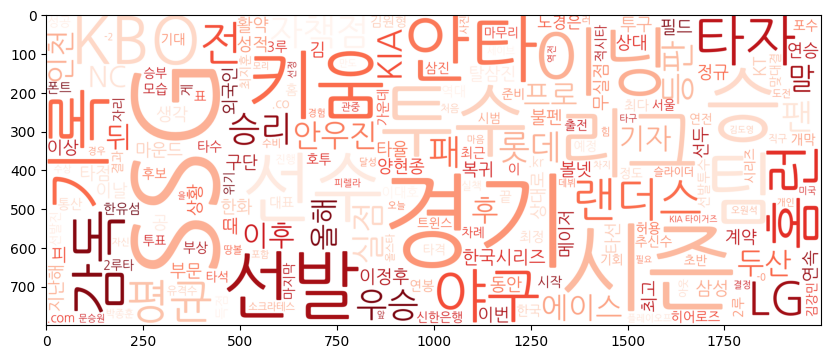

In [62]:
visualize_wordcloud(word_count_dict["김광현"], "Reds")

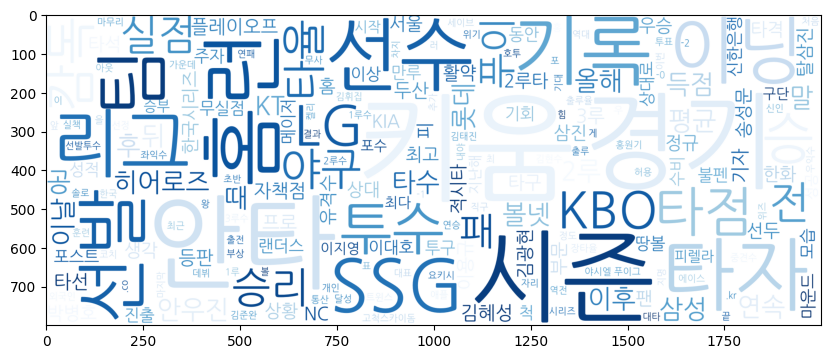

In [63]:
visualize_wordcloud(word_count_dict["이정후"], "Blues")

## 정리
이번 챕터에서는 자연어 데이터 시각화 하면 가장 먼저 떠오르는 워드 클라우드를 만들어 보았습니다. 사실 워드 클라우드는 직관적으로 의미를 전달하는 것이 어려워서 잘 사용되지 않습니다. 이어지는 챕터들에서 더 정교화 된 자연어처리 알고리즘들을 배워보겠습니다.